# Kruskal's Algorithms

Kruskal's algorithm is a greedy algorithm that is used to find the minimum spanning tree (MST) for a weighted, undirected graph.

## What is a minimum spanning tree?

Before, getting started with the algorithm, let us define, what is a minimum spanning tree?

Spanning trees are sub-graphs consisting of a subset of edges that connect all the nodes of the graph. For a given graph there could exist multiple spanning trees but there exists only one minimum spanning tree. The minimum spanning tree is defined as a sub-graph which contains the set of edges whose total weight is less than or equal to the weight of a spanning tree that covers all the nodes of the graph without forming any cycles. Simply put, a minimum spanning tree or MST for short is the collection of minium edges that will cover all the nodes on the graph.


## Application of MST in Networking
In the context of networking, the minimum spanning tree can be used in **Network Design**. Consider the scenario when we are interested to connect different offices/ devices that are spread over an area over a network. In this case, we would want to optimize for minimizing the total cost for providing the connections. Thus, a MST is used,
>so that only the minimum number of packets need to be relayed across the network and multiple copies of the same packet don't arrive via different paths (remember, any two nodes are connected via only a single path in a spanning tree). [[7]](#)

Variants of the Minimum Spanning Trees are used in problems like the **Widest Path Problem**. In the context of maximum flow in a network, the [widest path problem](https://www.quora.com/What-is-the-maximum-bottleneck-s-t-path-in-the-context-of-maximum-flow) refers to a path which has the highest flow between a specified pair of source and target nodes. In the widest path for a given graph, the amount of flows is equivalent to the smallest weight of an edge on the path, this means that the smallest weight constrains the amount of flows that can be sent from the source to the target node.

Another application of MSTs in networking can be found in th problem of autoconfig protocol for the ethernet briding to avoid cycles in a network

## Fetching required modules

Before, we get started lets import code modules which would make us focus on understanding the Bellmann-Ford's algorithm.

In [1]:
import os, sys
from os.path import dirname, join, abspath
import warnings
warnings.filterwarnings('ignore')

sys.path.insert(0, abspath(join(dirname("modules"), '..')))
from modules.create_graph import *
from modules.visualize_graph import *

<a class="anchor" id="graph1"></a>
## Building the graph

To establish the implementation of the Bellmann-Ford's algorithm, we create a weighted, undirected graph which is the same graph used in the previous notebooks.

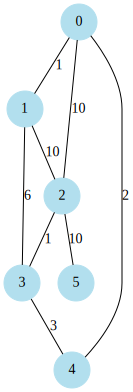

In [2]:
a = Node()
b = Node()
c = Node()
d = Node()
e = Node()
f = Node()

graphs = Graph.createGraph([a, b, c, d, e, f], directed=False)


graphs.add_Edge(a,b,1)
graphs.add_Edge(a,c,10)
graphs.add_Edge(a,e,2)
graphs.add_Edge(b,c,10)
graphs.add_Edge(b,d,6)
graphs.add_Edge(c,d,1)
graphs.add_Edge(c,f,10)
graphs.add_Edge(d,e,3)

visualizeGraph(graphs, "kruskal")

<a class="anchor" id="algorithm"></a>
## About the algorithm
The Kruskal Algorithm is a greedy algorithm to find the minimum spanning tree for an undirected, connected, weighted graph. If the term connected graph, sounds familiar, it is a graph where a path exists from one node to every other node on the graph. The algorithm has three primitive operations:
1. sort the edges of the graph in ascending order
2. pick the smallest edge and add it to the minimum spanning tree as long as it does not form a cycle
3. repeat operation (2) till the minimum spanning tree contains (|nodes in the graph| - 1) edges.

If you are wondering, how Kruskal's algorithm is greedy? 
The answer lies in operation (2) where in every iteration the algorithm picks the edge with the smallest weight for the minimum spanning tree. 

In operation (2), we select the edges for the minimum spanning tree such that the selected edge does not form a cycle. In this algorithm the Union-Find method also known as the [disjoint-set data strucutre](https://en.wikipedia.org/wiki/Disjoint-set_data_structure) is used. This operation is at the heart of the Kruskal's algorithm, so let us look into the union-find method. 

### Union-Find method/ data structure

The union-find method has two steps or sub-functions namely the `find()` and `union()`. The `Find()`  

**`Find()`**

**Path Compression**
<pre>1 <b>function</b> <i>Find</i>(x) <b>is</b>
2    <i>root</i>&nbsp;:= <i>x</i>
3    <b>while</b> root.parent ≠ <i>root</i>
4        <i>root</i>&nbsp;:= <i>root</i>.parent
5
6    <b>while</b> x.parent ≠ <i>root</i>
7        parent&nbsp;:= x.parent
8        x.parent&nbsp;:= root
9        <i>x</i>&nbsp;:= parent
10
11  <b>return</b> <i>root</i>
</pre>

**`Union()`**

**Union by rank**
<pre>1 <b>function</b> <i>Union</i>(x, y) <b>is</b>
2   <i>xRoot</i>&nbsp;:= <i>Find</i>(<i>x</i>)
3   <i>yRoot</i>&nbsp;:= <i>Find</i>(<i>y</i>)
4 
5   <u>// x and y are already in the same set</u>
6   <b>if</b> <i>xRoot</i> = <i>yRoot</i> <b>then</b>
7       <b>return</b>
8 
9   <u>// x and y are not in same set, so we merge them</u>
10   <b>if</b> <i>xRoot</i>.rank &lt; <i>yRoot</i>.rank <b>then</b>
11     <i>xRoot</i>, <i>yRoot</i>&nbsp;:= <i>yRoot</i>, <i>xRoot</i> // swap xRoot and yRoot
12 
13   <u>// merge yRoot into xRoot</u>
14   yRoot.parent&nbsp;:= xRoot
15   <b>if</b> xRoot.rank = yRoot.rank <b>then</b>
16     xRoot.rank&nbsp;:= xRoot.rank + 1
</pre>




### Psuedo code of Kruskal's algorithm
<pre>1 <b>function</b> Kruskal(<i>G</i>) <b>is</b>
2    mstList&nbsp;:= []
3    parent&nbsp;:= []
4    <b>for each</b> v ∈ G.V <b>do</b>
5        parent.add(v) //make set of disjoint trees
6    <b>for each</b> (u, v) <b>in</b> G.E ordered by weight(u, v), increasing <b>do</b>
7        <b>if</b> FIND(parent, u) ≠ FIND(parent, v) <b>then</b>
8           mstList&nbsp;:= mstList ∪ {(u, v)}
9           UNION(FIND(parent, u), FIND(parent, v))
10    <b>return</b> mstList
</pre>

<a class="anchor" id="implementation"></a>
## Implementing Kruskal's algorithm

In [3]:
#Function to find set(list implementation) of a node
def find(parent, nodeIndex):
    if parent[nodeIndex] == nodeIndex:
        return nodeIndex
    return find(parent, parent[nodeIndex])

#Function implementing union by rank for two sets x, y
def union(parent, rank, x, y):
    xRoot = find(parent, x)
    yRoot = find(parent, y)
    
    #Attach smaller rank under the root of a higher rank
    if rank[xRoot] < rank[yRoot]:
        parent[xRoot] = yRoot
    elif rank[xRoot] > rank[yRoot]:
        parent[yRoot] = xRoot
    #If ranks are same, pick one root and increment its rank by 1
    else:
        parent[yRoot] = xRoot #you could also make `xRoot` as root
        rank[yRoot] += 1
        
#Function implementing the Kruskal's algorithm
def kruskal(graph):
    mst = [] #stores the edges of the minimum spanning tree (MST)
    sortedListIndex = 0
    mstIndex = 0
    
    #sort the list of edges in the graph in ascending order
    edges = graph.get_allEdges()
    edges = sorted(edges, key=lambda item: item[2])
    
    parent = []
    rank = []
    
    #create a forest(group of trees) where each node is a tree
    for node in graph.get_allNodes():
        parent.append(node.index)
        rank.append(0)

    #number edges to be taken is |V| - 1
    while mstIndex < len(graph.get_allNodes()) - 1:
        #pick the edge with smallest weight and increment list index
        u, v, w = edges[sortedListIndex]
        sortedListIndex += 1
        
        x = find(parent, u)
        y = find(parent, v)
        
        #Add the edge to MST if it doesn't cause a cycle and increment mstIndex 
        if x != y:
            mstIndex += 1
            mst.append([u, v, w])
            union(parent, rank, x, y)
        #Else discard edge

    return mst

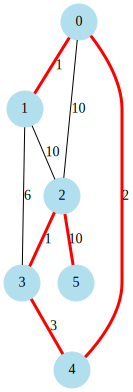

In [4]:
mst = kruskal(graphs)
displayPath(mst, "kruskal")

<a class="anchor" id="proof"></a>
## Proof of correctness
>The proof consists of two parts. First, it is proved that the algorithm produces a spanning tree. Second, it is proved that the constructed spanning tree is of minimal weight.

In order to prove the correctness of the Kruskal's algorithm, we first start by proving that the algorithm yields a spanning tree.


#### Proving a spanning tree is produced
>Let G be a connected, weighted graph and let Y be the subgraph of G produced by the algorithm. Y cannot have a cycle, being within one subtree and not between two different trees. Y cannot be disconnected, since the first encountered edge that joins two components of Y would have been added by the algorithm. Thus,  Y is a spanning tree of G.

Let G be the graph and G' be a sub-graph that is produced by the Kruskal's algorithm. Thus, G' cannot have a cycle since 

#### Minimality

>We show that the following proposition P is true by induction: If F is the set of edges chosen at any stage of the algorithm, then there is some minimum spanning tree that contains F.

>    * Clearly P is true at the beginning, when F is empty: any minimum spanning tree will do, and there exists one because a weighted connected graph always has a minimum spanning tree.
    *  Now assume P is true for some non-final edge set F and let T be a minimum spanning tree that contains F.
      -  If the next chosen edge e is also in T, then P is true for F + e.
      -  Otherwise, if e is not in T then T + e has a cycle C. This cycle contains edges which do not belong to F, since e does not form a cycle in F but does in T. Let f be an edge which is in C but not in F + e. Note that f also belongs to T, and by P has not been considered by the algorithm. f must therefore have a weight at least as large as e. Then T − f + e is a tree, and it has the same or less weight as T. So T − f + e is a minimum spanning tree containing F + e and again P holds.
    * Therefore, by the principle of induction, P holds when F has become a spanning tree, which is only possible if F is a minimum spanning tree itself.

<a class="anchor" id="references"></a>
## Reference

- [1] Leiserson, Charles Eric, Ronald L. Rivest, Thomas H. Cormen, and Clifford Stein. Introduction to algorithms. Chapter 23. Vol. 6. Cambridge, MA: MIT press, 2001.
- [2] Kruskal's algorithm on [Wikipedia](https://en.wikipedia.org/wiki/Kruskal%27s_algorithm)
- [3] Article on Kruskal's algorithm on [Geeks for Geeks](https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/)
- [4] Applications of Minimum Spanning Trees - [StackOverflow](https://stackoverflow.com/questions/21661341/real-world-applications-where-spanning-tree-data-structure-is-used)
- [5] Minimum Spanning Trees Lecture Slides from [Princeton](https://algs4.cs.princeton.edu/lectures/43MinimumSpanningTrees-2x2.pdf)
- [6] Disjoint-set data structure on [Wikipedia](https://en.wikipedia.org/wiki/Disjoint-set_data_structure)
- [7] Application of MST from Alex Allian's article on [cprogramming.com](https://www.cprogramming.com/tutorial/computersciencetheory/mst.html)